# 一、环境配置

## 1. 基础环境配置

In [ ]:
!pip install torch==1.10.0+cu111 torchvision==0.11.0+cu111 torchaudio==0.10.0 -f https://download.pytorch.org/whl/torch_stable.html  --no-cache-dir

In [ ]:
# 安装mmcv
!pip install ipykernel
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv>=2.0.0rc1'

In [1]:
# 安装相关工具
!mim install opencv-python pillow matplotlib seaborn tqdm 'mmdet>=3.0.0rc1'

#pytorch-lightning 建议不要

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html


## 2. 安装mmsegmentation

In [4]:
# 克隆仓库
# !git clone https://github.com/open-mmlab/mmsegmentation.git -b dev-1.x

Cloning into 'mmsegmentation'...
^C


In [ ]:
# 加载仓库
# import os
# os.chdir('mmsegmentation')
# os.getcwd()  # 确保在正

In [ ]:
# 配置开发环境
# !mim install -v -e .

In [7]:
 #准备权重文件和素材

#-----------------创建文件夹---------------------------

# 创建 checkpoint 文件夹，用于存放预训练模型权重文件
import os
# os.mkdir('checkpoint')

# 创建 outputs 文件夹，用于存放预测结果
# os.mkdir('outputs')

# 创建 data 文件夹，用于存放图片和视频素材
# os.mkdir('data')

In [ ]:
# 获取pspnet预训练文件目录
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_80k_cityscapes/pspnet_r50-d8_512x1024_80k_cityscapes_20200606_112131-2376f12b.pth -P checkpoint

## 3. 下载data数据

In [5]:
# 下载data数据

# 伦敦街景图片
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_uk.jpeg -P data

# 上海驾车街景视频，视频来源：https://www.youtube.com/watch?v=ll8TgCZ0plk
!wget https://zihao-download.obs.cn-east-3.myhuaweicloud.com/detectron2/traffic.mp4 -P data

# 街拍视频，2022年3月30日
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_20220330_174028.mp4 -P data

--2023-06-18 12:01:51--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_uk.jpeg
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 469065 (458K) [image/jpeg]
Saving to: ‘data/street_uk.jpeg’

street_uk.jpeg      100%[===================>] 458.07K  2.35MB/s    in 0.2s    

2023-06-18 12:01:52 (2.35 MB/s) - ‘data/street_uk.jpeg’ saved [469065/469065]

--2023-06-18 12:01:52--  https://zihao-download.obs.cn-east-3.myhuaweicloud.com/detectron2/traffic.mp4
Resolving zihao-download.obs.cn-east-3.myhuaweicloud.com (zihao-download.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.163, 121.36.235.162
Connecting to zihao-download.obs.cn-east-3.myhuaweicloud.com (zihao-download.obs.cn-e

## 4. 检查安装环境

In [8]:
# 检查 Pytorch
print('='*30)
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())
print('-'*30)

# 检查 mmcv
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())
print('-'*30)

# 检查 mmsegmentation
import mmseg
from mmseg.utils import register_all_modules
from mmseg.apis import inference_model, init_model
print('mmsegmentation版本', mmseg.__version__)
print('='*30)

/home/hanhan/anaconda3/envs/mmseg/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Pytorch 版本 1.10.0+cu111
CUDA 是否可用 True
------------------------------
MMCV版本 2.0.0
CUDA版本 11.1
编译器版本 GCC 7.3
------------------------------
mmsegmentation版本 1.0.0


In [5]:
# 找到 Matplotlib 的安装位置
import matplotlib
print(matplotlib.__file__)

/home/hanhan/anaconda3/envs/mmseg/lib/python3.8/site-packages/matplotlib/__init__.py


# 二. 准备数据

## 1. 获取数据

In [ ]:

# 下载labelme数据
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Labelme.zip


# 下载处理好的分割数据
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip

## 2. 数据集可视化

In [1]:
# 导入相关库
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#  指定图像和标注路径
# 提前修改好 21746 和 01bd155 两张图片的名称，使之对应
PATH_IMAGE = 'data/Watermelon87_Semantic_Seg_Mask/img_dir/train'
PATH_MASKS = 'data/Watermelon87_Semantic_Seg_Mask/ann_dir/train'

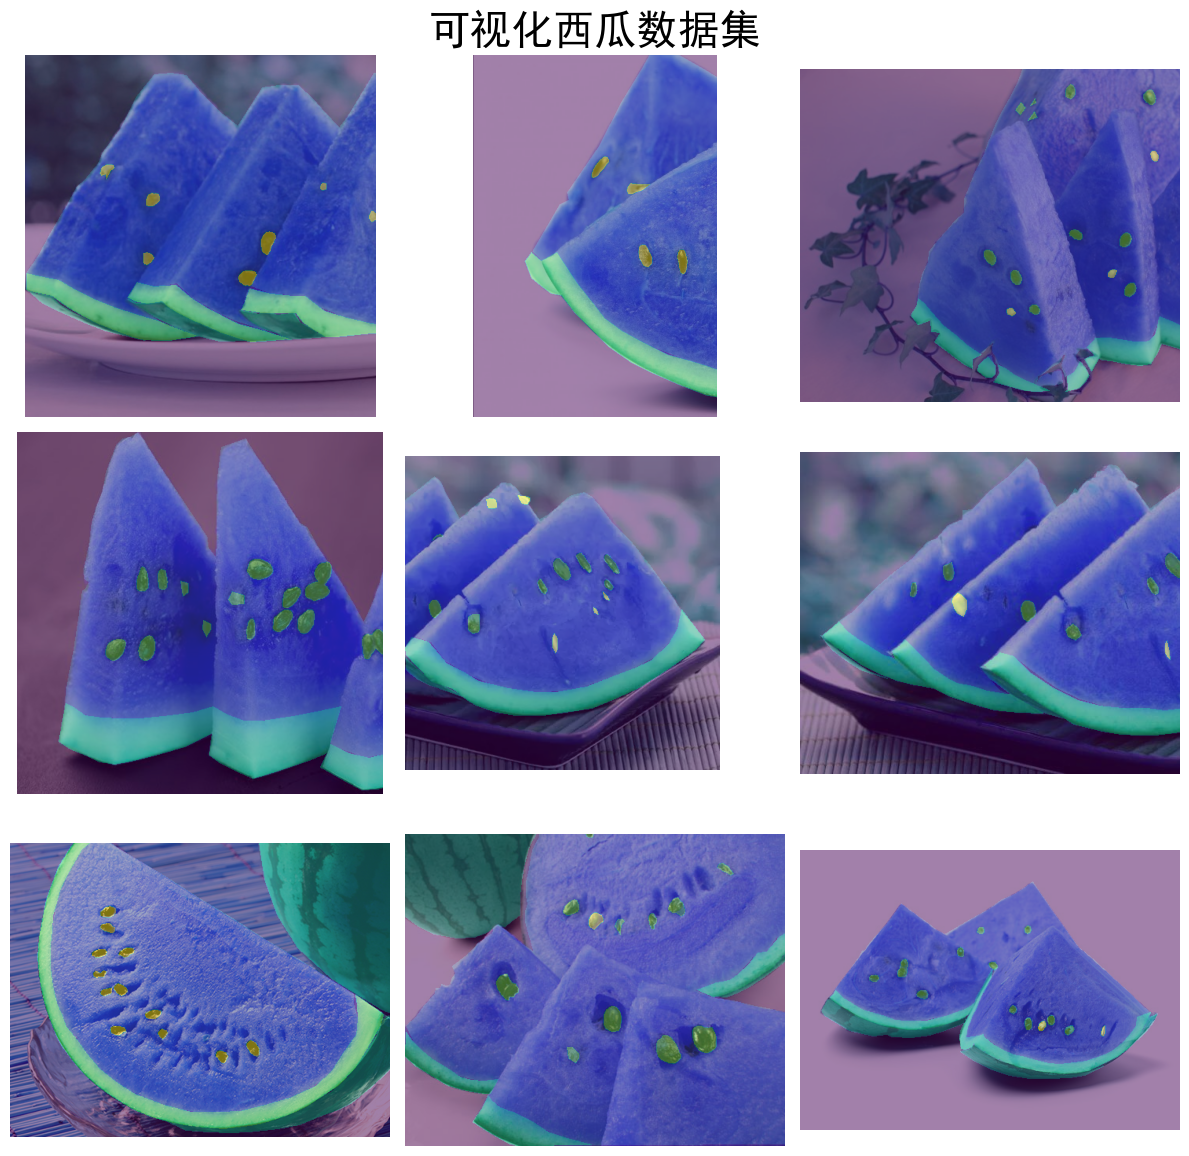

In [4]:
# n行n列可视化
n = 3

# 标注区域透明度
opacity = 0.5

fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(12,12))

for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:n**2]):
    
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name.split('.')[0]+'.png')
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    
    # 可视化
    axes[i//n, i%n].imshow(img)
    axes[i//n, i%n].imshow(mask[:,:,0], alpha=opacity)
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示

matplotlib.rc("font",family='SimHei') # 中文字体
fig.suptitle('可视化西瓜数据集', fontsize=30)
plt.tight_layout()
plt.show()

# 三. 配置文件

## 1. 导入依赖库

In [20]:
import numpy as np
from PIL import Image

import os.path as osp
from tqdm import tqdm

import mmcv
import mmengine
import matplotlib.pyplot as plt
%matplotlib inline

## 2. 定义数据集类（各类别名称及配色）

In [12]:
from mmseg.registry import DATASETS
from .basesegdataset import BaseSegDataset

@DATASETS.register_module()
class WatermelonDataset(BaseSegDataset):
    # 类别和对应的可视化配色
    METAINFO = {
        'classes':['red', 'green', 'white', 'seed-black', 'seed-white', 'Unlabeled'],
        'palette':[[255, 75, 104], [100, 245, 141], [251, 255, 163], [0, 65, 130], [17, 141, 240], [63, 193, 201]]
    }
    # 指定图像扩展名、标注扩展名
    def __init__(self,
                 img_suffix='.jpg',
                 seg_map_suffix='.png',
                 reduce_zero_label=False, # 类别ID为0的类别是否需要除去
                 **kwargs) -> None:
        super().__init__(
            img_suffix=img_suffix,
            seg_map_suffix=seg_map_suffix,
            reduce_zero_label=reduce_zero_label,
            **kwargs)
        


## 3. dataset 注册数据类

In [ ]:
# 在 mmseg/datasets/__init__.py 中添加以下内容：
from .ade import ADE20KDataset
from .basesegdataset import BaseCDDataset, BaseSegDataset
from .chase_db1 import ChaseDB1Dataset
from .cityscapes import CityscapesDataset
from .coco_stuff import COCOStuffDataset
from .dark_zurich import DarkZurichDataset
from .dataset_wrappers import MultiImageMixDataset
from .decathlon import DecathlonDataset
from .drive import DRIVEDataset
from .dsdl import DSDLSegDataset
from .hrf import HRFDataset
from .isaid import iSAIDDataset
from .isprs import ISPRSDataset
from .levir import LEVIRCDDataset
from .lip import LIPDataset
from .loveda import LoveDADataset
from .mapillary import MapillaryDataset_v1, MapillaryDataset_v2
from .night_driving import NightDrivingDataset
from .pascal_context import PascalContextDataset, PascalContextDataset59
from .potsdam import PotsdamDataset
from .refuge import REFUGEDataset
from .stare import STAREDataset
from .synapse import SynapseDataset
from .watermellondataset import WatermelonDataset # 添加1

# yapf: disable
from .transforms import (CLAHE, AdjustGamma, Albu, BioMedical3DPad,
                         BioMedical3DRandomCrop, BioMedical3DRandomFlip,
                         BioMedicalGaussianBlur, BioMedicalGaussianNoise,
                         BioMedicalRandomGamma, ConcatCDInput, GenerateEdge,
                         LoadAnnotations, LoadBiomedicalAnnotation,
                         LoadBiomedicalData, LoadBiomedicalImageFromFile,
                         LoadImageFromNDArray, LoadMultipleRSImageFromFile,
                         LoadSingleRSImageFromFile, PackSegInputs,
                         PhotoMetricDistortion, RandomCrop, RandomCutOut,
                         RandomMosaic, RandomRotate, RandomRotFlip, Rerange,
                         ResizeShortestEdge, ResizeToMultiple, RGB2Gray,
                         SegRescale)
from .voc import PascalVOCDataset

# yapf: enable
__all__ = [
    'BaseSegDataset', 'BioMedical3DRandomCrop', 'BioMedical3DRandomFlip',
    'CityscapesDataset', 'PascalVOCDataset', 'ADE20KDataset',
    'PascalContextDataset', 'PascalContextDataset59', 'ChaseDB1Dataset',
    'DRIVEDataset', 'HRFDataset', 'STAREDataset', 'DarkZurichDataset',
    'NightDrivingDataset', 'COCOStuffDataset', 'LoveDADataset',
    'MultiImageMixDataset', 'iSAIDDataset', 'ISPRSDataset', 'PotsdamDataset',
    'LoadAnnotations', 'RandomCrop', 'SegRescale', 'PhotoMetricDistortion',
    'RandomRotate', 'AdjustGamma', 'CLAHE', 'Rerange', 'RGB2Gray',
    'RandomCutOut', 'RandomMosaic', 'PackSegInputs', 'ResizeToMultiple',
    'LoadImageFromNDArray', 'LoadBiomedicalImageFromFile',
    'LoadBiomedicalAnnotation', 'LoadBiomedicalData', 'GenerateEdge',
    'DecathlonDataset', 'LIPDataset', 'ResizeShortestEdge',
    'BioMedicalGaussianNoise', 'BioMedicalGaussianBlur',
    'BioMedicalRandomGamma', 'BioMedical3DPad', 'RandomRotFlip',
    'SynapseDataset', 'REFUGEDataset', 'MapillaryDataset_v1',
    'MapillaryDataset_v2', 'Albu', 'LEVIRCDDataset',
    'LoadMultipleRSImageFromFile', 'LoadSingleRSImageFromFile',
    'ConcatCDInput', 'BaseCDDataset', 'DSDLSegDataset','WatermelonDataset' # 添加2
]

## 4. 定义训练及测试 pipeline

In [ ]:
# 创建文件configs/_base_/datasets/watermelondataset.py，仅修改数据类名和数据集路径：

# dataset settings
dataset_type = 'WatermelonDataset' # 数据集类名
data_root = '/home/hanhan/cc_wrod/develop/mmlab/mmsegmentation/data/Watermelon87_Semantic_Seg_Mask/' # 修改为自己训练的主目录
crop_size = (64, 64)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(
        type='RandomResize',
        scale=(2048, 1024),
        ratio_range=(0.5, 2.0),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='PackSegInputs')
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(2048, 1024), keep_ratio=True),
    # add loading annotation after ``Resize`` because ground truth
    # does not need to do resize data transform
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]
img_ratios = [0.5, 0.75, 1.0, 1.25, 1.5, 1.75]
tta_pipeline = [
    dict(type='LoadImageFromFile', file_client_args=dict(backend='disk')),
    dict(
        type='TestTimeAug',
        transforms=[
            [
                dict(type='Resize', scale_factor=r, keep_ratio=True)
                for r in img_ratios
            ],
            [
                dict(type='RandomFlip', prob=0., direction='horizontal'),
                dict(type='RandomFlip', prob=1., direction='horizontal')
            ], [dict(type='LoadAnnotations')], [dict(type='PackSegInputs')]
        ])
]
train_dataloader = dict(
    batch_size=2,
    num_workers=2,
    persistent_workers=True,
    sampler=dict(type='InfiniteSampler', shuffle=True),
    dataset=dict(
        type=dataset_type,
        data_root=data_root,
        data_prefix=dict(
            img_path='img_dir/train', seg_map_path='ann_dir/train'), # 修改训练集数据图片路径和标签路径
        pipeline=train_pipeline))
val_dataloader = dict(
    batch_size=1,
    num_workers=4,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=False),
    dataset=dict(
        type=dataset_type,
        data_root=data_root,
        data_prefix=dict(
            img_path='img_dir/val', seg_map_path='ann_dir/val'), # 修改验证集数据图片路径和标签路径
        pipeline=test_pipeline))
test_dataloader = val_dataloader

val_evaluator = dict(type='IoUMetric', iou_metrics=['mIoU'])
test_evaluator = val_evaluator

In [21]:
from mmengine import Config
cfg = Config.fromfile('Watermellon/configs/pspseg_r50-d8_4xb2-40k_watermelon.py')

In [22]:
cfg.norm_cfg = dict(type='BN', requires_grad=True) # 只使用GPU时，BN取代SyncBN
cfg.crop_size = (256, 256)
cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head

# 模型 decode/auxiliary 输出头，指定为类别个数
cfg.model.decode_head.num_classes = 6
cfg.model.auxiliary_head.num_classes = 6

cfg.train_dataloader.batch_size = 8

cfg.test_dataloader = cfg.val_dataloader

# 结果保存目录
cfg.work_dir = './work_dirs/WatermelonDataset'

# 训练迭代次数
cfg.train_cfg.max_iters = 5000
# 评估模型间隔
cfg.train_cfg.val_interval = 400
# 日志记录间隔
cfg.default_hooks.logger.interval = 100
# 模型权重保存间隔
cfg.default_hooks.checkpoint.interval = 1500

# 随机数种子
cfg['randomness'] = dict(seed=0)

In [23]:
# 查看完整配置文件
print(cfg.pretty_text)

norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(64, 64))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(256, 256)),
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='PSPHead',
        in_channels=2048,
        in_index=3,
        channels=51

In [24]:
cfg.dump('pspseg_r50-d8_4xb2-40k_watermelon_final.py')

# 四 模型训练

In [25]:
# 检查当前路径
os.getcwd()

'/home/hanhan/cc_wrod/develop/mmlab/mmsegmentation'

## 1. 导入工具包

In [26]:
import numpy as np

import os.path as osp
from tqdm import tqdm

import mmcv
import mmengine

## 2. 载入配置文件并准备训练

In [27]:
from mmengine import Config
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# 载入配置
cfg = Config.fromfile('pspseg_r50-d8_4xb2-40k_watermelon_final.py')

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner
register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

06/18 16:06:49 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.13 (default, Oct 21 2022, 23:50:54) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 3070 Ti Laptop GPU
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.4, V11.4.48
    GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
    PyTorch: 1.10.0+cu111
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50

/home/hanhan/cc_wrod/develop/mmlab/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/home/hanhan/cc_wrod/develop/mmlab/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/hanhan/cc_wrod/develop/mmlab/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


06/18 16:06:59 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/18 16:06:59 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/home/hanhan/cc_wrod/develop/mmlab/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [28]:
runner.train()

06/18 16:07:00 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
06/18 16:07:01 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
06/18 16:07:01 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c
06/18 16:07:01 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

06/18 16:07:02 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
06/18 16:07:02 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
06/18 16:07:02 - mmengine - INFO - Checkpoints will be saved to /home/hanhan/cc_wrod/develop/mmlab/mmsegmentation/work_dirs/WatermelonDataset.
06/18 16:07:06 - mmengine - INFO - Exp name: pspseg_r50-d8_4xb2-40k_watermelon_final_20230618_160648
06/18 16:07:06 - mmengine 

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

# 五. 可视化数据集路径

In [39]:
# 查看当前目录
os.getcwd()

'/home/hanhan/cc_wrod/develop/mmlab/mmsegmentation'

In [28]:
import pandas as pd
# 解决中文乱码
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


%matplotlib inline

# 日志文件路径
log_path = 'work_dirs/WatermelonDataset/20230618_160648/vis_data/scalars.json'

# 查看日志文件
with open(log_path, "r") as f:
    json_list = f.readlines()

print(len(json_list))
print('-'*30)
eval(json_list[4])

63
------------------------------


{'lr': 0.009911076035273796,
 'data_time': 0.009896802902221679,
 'loss': 0.0671923141926527,
 'decode.loss_ce': 0.04817076735198498,
 'decode.acc_seg': 84.1949462890625,
 'aux.loss_ce': 0.019021546375006436,
 'aux.acc_seg': 81.9610595703125,
 'time': 0.328656005859375,
 'iter': 400,
 'memory': 3774,
 'step': 400}

pandas 2.0当中移除了addpend属性，直接使用append会出现报错，需要下降版本到1.3.4


In [29]:
# ! pip intall pandas==1.3.4
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    # print(each)
    if 'aAcc' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    #     # df_test = df_test.concat([df_test,eval(each)])
    else:
        df_train = df_train.append(eval(each), ignore_index=True)
        # df_train = df_train.concat([df_train,eval(each)])
        


In [30]:

df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux.loss_ce,aux.acc_seg,time,iter,memory,step
0,0.009999,0.026597,0.148552,0.105439,30.462646,0.043113,27.474976,0.782223,6.0,4546.0,6.0
1,0.009978,0.011201,0.071653,0.049379,77.438354,0.022274,81.011963,0.341130,100.0,3774.0,100.0
2,0.009956,0.011916,0.072099,0.050145,81.216431,0.021954,69.497681,0.342335,200.0,3774.0,200.0
3,0.009933,0.010823,0.054387,0.037355,80.163574,0.017031,76.559448,0.324865,300.0,3774.0,300.0
4,0.009911,0.009897,0.067192,0.048171,84.194946,0.019022,81.961060,0.328656,400.0,3774.0,400.0
5,0.009889,0.011533,0.049318,0.034702,74.655151,0.014616,77.114868,0.339037,500.0,3774.0,500.0
6,0.009866,0.011401,0.054014,0.038815,80.264282,0.015199,82.461548,0.330887,600.0,3774.0,600.0
7,0.009844,0.010734,0.041135,0.028629,89.880371,0.012506,89.755249,0.336545,700.0,3774.0,700.0
8,0.009822,0.010658,0.043478,0.030555,82.986450,0.012924,82.464600,0.327103,800.0,3774.0,800.0
9,0.009800,0.010833,0.042385,0.029296,85.781860,0.013089,85.565186,0.326133,900.0,3774.0,900.0


In [31]:
df_test

,aAcc,mIoU,mAcc,data_time,time,step
0,80.82,40.87,49.99,0.026046,0.822428,400.0
1,85.71,49.29,57.13,0.006287,0.226299,800.0
2,89.93,55.88,62.01,0.006168,0.234830,1200.0
3,88.21,53.38,64.18,0.006140,0.212602,1600.0
4,89.26,56.14,62.41,0.006264,0.226780,2000.0
5,87.36,50.41,57.43,0.006323,0.227528,2400.0
6,92.69,62.05,67.85,0.006162,0.230408,2800.0
7,90.15,58.35,63.46,0.005810,0.230291,3200.0
8,88.60,58.62,65.23,0.005843,0.230870,3600.0
9,91.33,60.34,67.47,0.005954,0.228281,4000.0


## 3. 导出训练日志

In [32]:
df_train.to_csv('train_log.csv', index=False)
df_test.to_csv('val_log.csv', index=False)

In [7]:
from matplotlib import colors as mcolors

import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

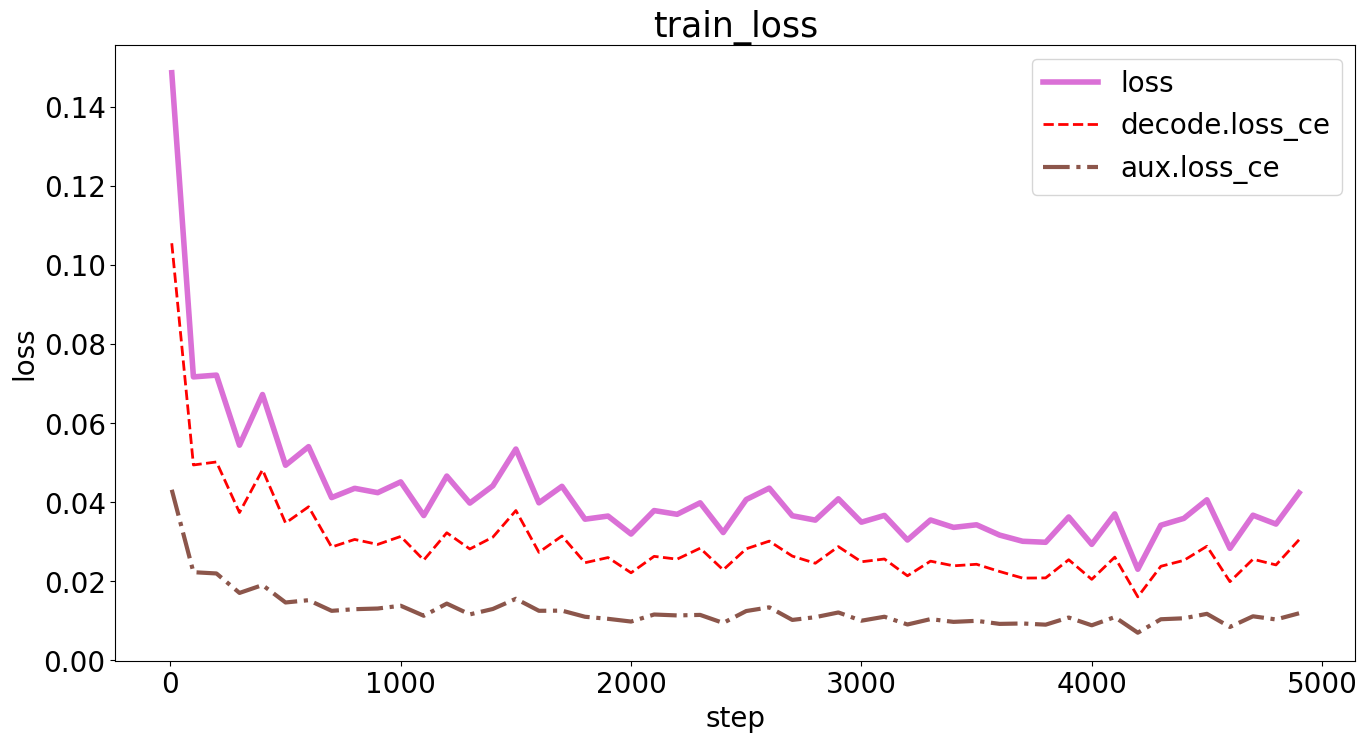

In [10]:
# 训练集损失函数
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('train_loss', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

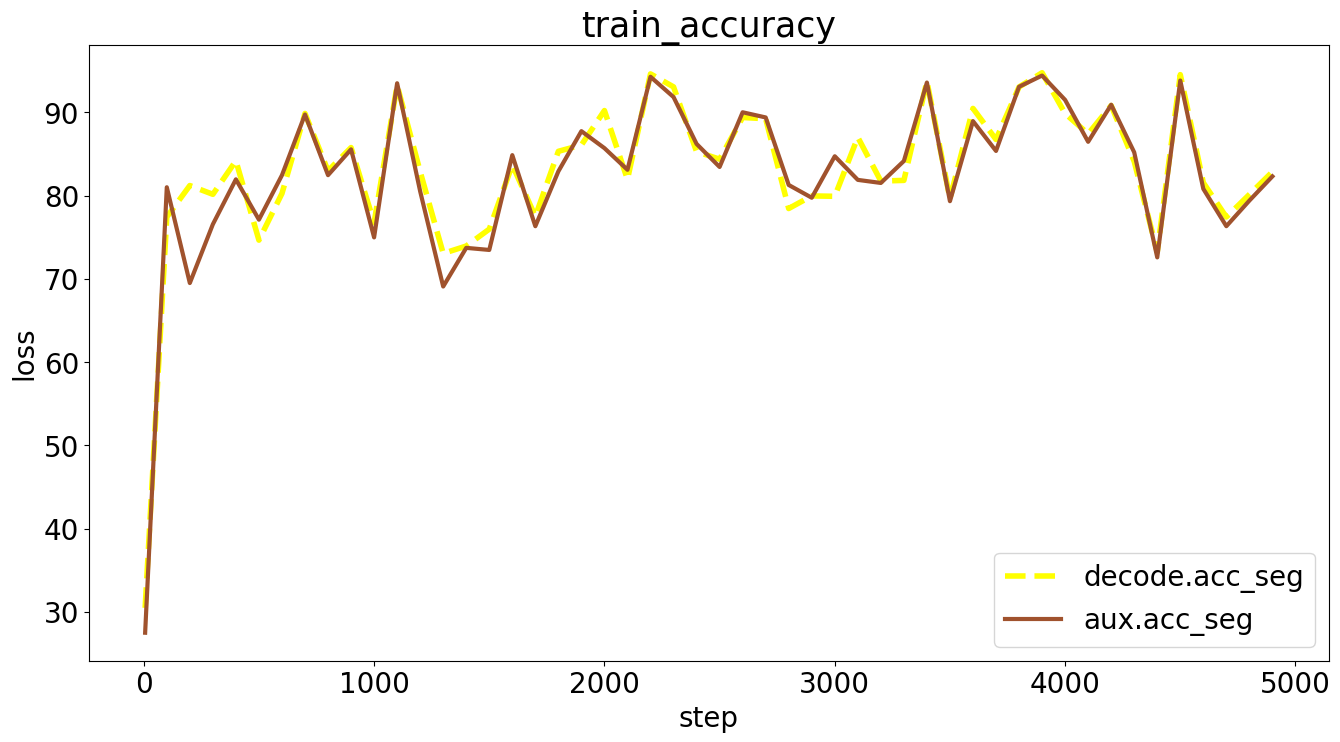

In [11]:
# 训练集准确率
metrics = ['decode.acc_seg', 'aux.acc_seg']

plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('train_accuracy', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

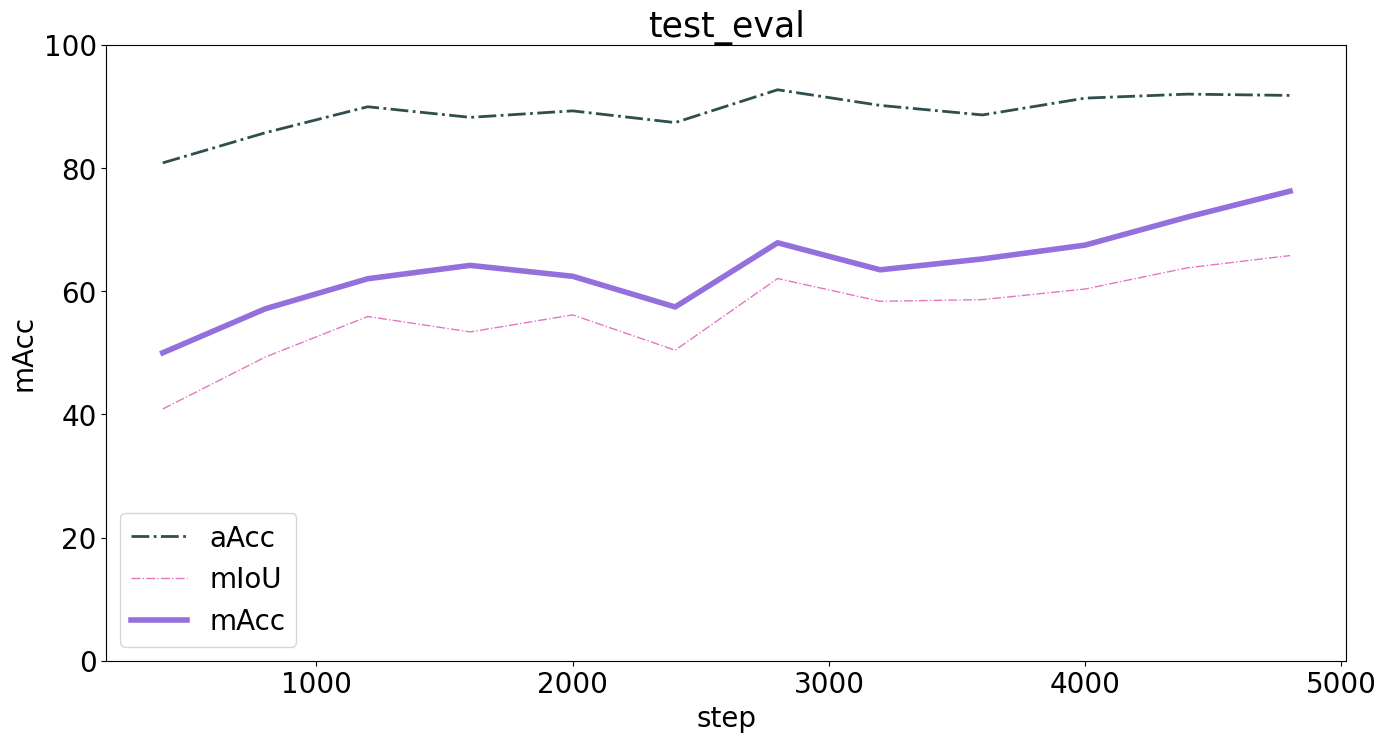

In [12]:
# 测试集评估指标
metrics = ['aAcc', 'mIoU', 'mAcc']

plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('test_eval', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

# 六. 模型推理

In [14]:
# 查看当前目录
import os
os.getcwd()

'/home/hanhan/cc_wrod/develop/mmlab/mmsegmentation'

## 1. 导入配置文件

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mmseg.apis import init_model, inference_model, show_result_pyplot
import mmcv
import cv2

from mmengine.runner import Runner
from mmseg.utils import register_all_modules


# 载入 config 配置文件
from mmengine import Config
cfg = Config.fromfile('pspseg_r50-d8_4xb2-40k_watermelon_final.py')

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner
register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

/home/hanhan/anaconda3/envs/mmseg/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


06/18 17:06:33 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.13 (default, Oct 21 2022, 23:50:54) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 3070 Ti Laptop GPU
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.4, V11.4.48
    GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
    PyTorch: 1.10.0+cu111
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50

/home/hanhan/cc_wrod/develop/mmlab/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/home/hanhan/cc_wrod/develop/mmlab/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/hanhan/cc_wrod/develop/mmlab/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


06/18 17:06:59 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/18 17:06:59 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/home/hanhan/cc_wrod/develop/mmlab/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


## 2. 载入模型

In [35]:
checkpoint_path = './work_dirs/WatermelonDataset/iter_5000.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

/home/hanhan/cc_wrod/develop/mmlab/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/hanhan/cc_wrod/develop/mmlab/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ./work_dirs/WatermelonDataset/iter_5000.pth


In [1]:


!python tools/test.py ./pspseg_r50-d8_4xb2-40k_watermelon_final.py \
                      ./work_dirs/WatermelonDataset/iter_5000.pth

06/18 17:35:34 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.13 (default, Oct 21 2022, 23:50:54) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 3070 Ti Laptop GPU
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.4, V11.4.48
    GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
    PyTorch: 1.10.0+cu111
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50

## 3. 预测自己测试图像

In [36]:
# 读取图像
img = mmcv.imread('./data/test.jpg')

# 推理
result = inference_model(model, img)
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

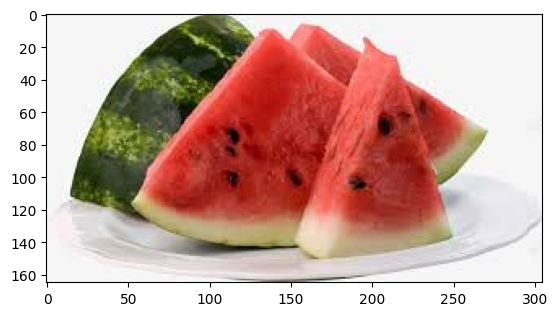

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

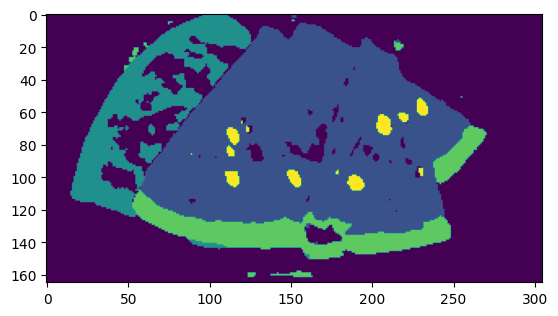

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

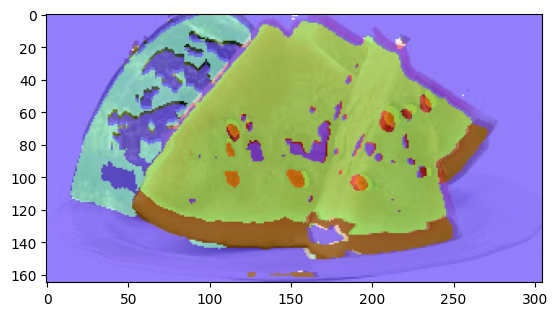

In [37]:
# 可视化预测结果
plt.imshow(img[:,:,::-1])
plt.show()

plt.imshow(pred_mask)
plt.show()

visualization = show_result_pyplot(model, img, result, opacity=0.7, out_file='pred.jpg')
plt.imshow(mmcv.bgr2rgb(visualization))
plt.show()